In [ ]:
import pandas as pd

In [ ]:
df1 = pd.read_excel('./04_Data.xlsx', skiprows=1) #excel 에서의 1번 인덱스를 없애줌.
df1.head(3)

In [ ]:
df1.columns

In [ ]:
#재구조화 reshape
df2 = df1.melt(id_vars=['구분','카테고리명', '자재그룹', '자재그룹명',
                  '제품명','단위','판매','안전재고',' 분류'])

In [ ]:
df3 = df2.rename(columns={'variable':'공급일자', 'value' : '판매금액'})
df3

In [ ]:
df3['공급연도'] = df3['공급일자'].dt.year
df3['공급연도']

In [ ]:
p1 = df3.pivot_table(index=' 분류', columns='공급연도', values='판매금액', aggfunc='sum').reset_index()
p1['전년대비증감액'] = (p1[2020] - p1[2019]/p1[2019])
p1

In [ ]:
df3.head(2)

# Mission

* 해당 데이터를 이용해 아래와 같은 분석을 실시하고자 한다 
1) df3 데이터에서 '판매금액'이 가장높은 '제품명' 2가지를 확인하고, 2가지 제품의 '판매금액'의 평균의 차이가 있는지 가설검정 수행  

2) df3 데이터에서 ' 분류'에 따른 '판매금액'의 합을 계산하고, Plotly 라이브러리를 이용해 막대그래프로 시각화 

* 03_Data.csv 데이터 (Web 추출된 트래픽 데이터) 
3) 03_Data.csv를 불러와 df4 로 선언하고, 데이터의 구조와 타입을 확인 

4) df4데이터의 '프로그램'항목의 종류와 빈도수를 확인 

5) df4데이터의 '채널'별 '최종결제금액'의 합을 계산 

6) df4데이터에서 '결제시각'데이터를 이용해 '결제일자_dt'의 항목명으로 날짜타입의 파생변수를 생성 
    - apply -> '결제시각'데이터에서 결제일자와 결제시간을 분리 후 날짜형태로 변환

7) 'facebook'으로 유입된 고객들과 'naver'로 유입된 고객들의 '최종결제금액'의 평균의 차이가 있는지 시각화 / 가설검정 

0001jmp@gmail.com /

In [ ]:
import pandas as pd
import plotly.express as px
import scipy.stats as stats

# 1번

In [ ]:
# 1) df3 데이터에서 '판매금액'이 가장높은 '제품명' 2가지를 확인하고, 
# 2가지 제품의 '판매금액'의 평균의 차이가 있는지 가설검정 수행  

df3[[ '제품명', '판매금액']].sort_values(by='판매금액',ascending=False)
# df3['제품명'].value_counts()
m1 = df3.pivot_table(index='제품명', values='판매금액', aggfunc='sum').sort_values(by='판매금액',ascending=False).index.to_list()[:2]
# print(m1)

cond1 = (df3['제품명']==m1[0])
cond2 = (df3['제품명']== m1[1])

stats.ranksums(df3.loc[cond1]['판매금액'], df3.loc[cond2]['판매금액'])

# 2번

In [ ]:
df3.head(2)

In [ ]:
# 2) df3 데이터에서 ' 분류'에 따른 '판매금액'의 합을 계산하고, Plotly 라이브러리를 이용해 막대그래프로 시각화 


p1 = df3.pivot_table(index=' 분류', values='판매금액', aggfunc='sum').reset_index()
px.bar(p1, x='판매금액', y = ' 분류')

In [ ]:
# 3) 03_Data.csv를 불러와 df4 로 선언하고, 데이터의 구조와 타입을 확인 

df4 = pd.read_csv('./03_Data.csv')

df4.info()

In [ ]:
# 4) df4데이터의 '프로그램'항목의 종류와 빈도수를 확인 

df4['프로그램'].value_counts()

In [ ]:
# 5) df4데이터의 '채널'별 '최종결제금액'의 합을 계산 

df4['채널']
df4.pivot_table(index='채널', values='최종결제금액', aggfunc='sum')

In [ ]:
#6) df4데이터에서 '결제시각'데이터를 이용해 '결제일자_dt'의 항목명으로 날짜타입의 파생변수를 생성 
#   - apply -> '결제시각'데이터에서 결제일자와 결제시간을 분리 후 날짜형태로 변환

df4['결제시각']
# pd.to_datetime(df4['결제시각'], format='%Y-%m-%d')

In [ ]:
# df4['결제시각'] = pd.to_datetime(df4['결제시각'], format='%Y-%m-%d %H:%M:%S', errors='raise')


In [ ]:
def func1(data):
    result_date = str(data)
    return result_date[:11]

def func2(data):
    result_date = str(data)
    return result_date[14:]

In [ ]:
def func1(data):
    result_date = str(data)
    return result_date[:11]

def func2(data):
    result_date = str(data)
    return result_date[14:]

df4['결제날짜'] = df4['결제시각'].apply(func1)
df4['결제시간'] = df4['결제시각'].apply(func2)
# pd.to_datetime(df4['결제날짜'], format='%Y-%m-%d')
df4['결제날짜']

def func_data(data):
    return

In [ ]:
df4['결제일자_dt'] =  pd.to_datetime(df4['결제날짜'])
# # df4['결제일자_time'] =  pd.to_datetime(df4['결제날짜'])
df4['결제월'] = df4['결제일자_dt'].dt.month


In [ ]:
df4.pivot_table(index='채널', columns='결제월', values='최종결제금액', aggfunc='sum',
               margins=True, fill_value=0)

In [ ]:
#7) 'facebook'으로 유입된 고객들과 'naver'로 유입된 고객들의 '최종결제금액'의 평균의 차이가 있는지 시각화 / 가설검정 

p2 = df4.pivot_table(index='채널', values='최종결제금액',aggfunc='mean').reset_index()
p2
# px.bar(p2, x='채널', y = '최종결제금액')
stats.ranksums(p2['최종결제금액'], p2['최종결제금액'])

In [ ]:
# 8) 'facebook'으로 유입된 고객들 중, '최종결제금액'이 가장 높은 상위 10명의 명단을
#     추출하여 result1_facebook.xlsx로 저장

cond1 = df4['채널'] == 'facebook'

df4.loc[cond1]['최종결제금액'].sort_values( ascending=False).head(10)

In [ ]:
help(pd.pivot_table)

# 제조 공정/품질 데이터 분석

- 공정 데이터 분석 : Q (Quality, 품질) C (Cost, 비용) D (Delivery, 배송)
- **Q (Quality, 품질)** : 제품 생산 및 품질 검사에서 나오는 데이터를 이용해 품질을 향상시키기 위한 개선작업

- QC7 (QUALITY CONTROL 7) : 적정 수준의 품질을 관리하기 위한, 데이터로 부터 확인하는 7가지 도구

    - 1) 특성요인도 (Fish Bone Chart) : 결과(특성)에 어떤 요인(원인, 재료, 근무자, 설비, 방법)이 작용하는지 그래프로 표현
        (4M : Man/ Material/ Machine/ Method)
        
    - 2) 관리 항목 (Check Sheet) : 품질에 영향을 주는 주 항목들을 범주형 항목별로 구분하여 정리한 표(점검용/기록용) 
    - 3) 층별화 (Stratidication) : 데이터를 특성에 따라 나누어 통계량을 확인
    - 4) **히스토 그램 (Histogram)** : 공정 작업/ 품질검사에서 발생하는 연속형 자료들의 분포를 확인 -> 이상치 판단하기 위해 시각화
    - 5)**산점도 (Scatter Chart)** : 공정에서 발생하는 주요 인자들 간의 상관관계를 좌표평면 위의 점 형태로 표현한 그래프
    - 6)**파레토도표 (Pareto Plot)** : 공장에서 발생하는 주 핵심 지표 (결점수 ,불량지수, VOC, ...)막대그래프(빈도수) + 선 그래프(누적확률)
    
        - 파레토 법칙 : 전체 80% 결과는 20%의 원인에 의해 발생된다.
        
    - 7)**관리도 (Control Chart)** : 공정이나 품질에서 발생하는 데이터의 이상치를 확인하고 빠르게 조치하기 위해 사용하는 시각화 기법
    

In [ ]:
df1 = pd.read_csv('./07_Data.csv')
df1.isnull().sum()

In [ ]:
df1['메세지'].value_counts() # 에러메세지로 층별화를 할 수 있다.ㅇ

In [ ]:
df1.head(2)

In [ ]:
df1.info()

In [ ]:
df1['제품두께'].unique()

In [ ]:
# replace 를 이용하여 기존의 값을 다른 값으로 변환
df1['제품두께(float)'] = df1['제품두께'].replace({'415-515':4.5,
                     '417-518' : 5.0}).astype(float)

In [ ]:
df1.head(2)

In [ ]:
df1['제품싸이즈'].unique()

In [ ]:
def func1(data):
    if pd.isnull(data): #문자데이터 처리 시, nan 결측값(float) 실수형으로 인식
        return 0     # na 결측값을 모두 0으로 처리
    result = data.split('-')[1]
    if len(result) >= 2 :
        return result[1]
    else:
        return 0




In [ ]:
def func2(data):
    if pd.isnull(data): #문자데이터 처리 시, nan 결측값(float) 실수형으로 인식
        return 0     # na 결측값을 모두 0으로 처리
    result = data.split('-')
    if len(result) >= 2 :
        return result[1]
    else:
        return 0
    
df1['제품세로사이즈'] = df1['제품싸이즈'].apply(func2)

In [ ]:
df1.head(2)

In [ ]:
df1.describe()

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.rc('font', family='AppleGothic')

In [ ]:
# plt.xlim( 100)
sns.displot(data=df1, x='정지시간2', kde=True)

In [ ]:
sns.displot(data=df1, x='정지시간2', kde=True, col='작업구분')

In [ ]:
# 'Dooe open' 오류만 추출하여 작업구분 별 정지시간 2 분포를 확인
cond1 = (df1['메세지']=='Door Open')
cond2 = (df1['정지시간2'] <= 120)
sns.displot(data=df1.loc[cond1 & cond2], x='정지시간2', kde=True, col='작업구분')

In [ ]:
sns.displot(data=df1.loc[cond1 & cond2], x='정지시간2', col='작업구분',
            hue='작업자',kind='kde')

In [ ]:
#산점도
# plt.xlim([0, 0.3])
plt.ylim([0, 1])
sns.scatterplot(data=df1, x='정지시간', y='제품두께(float)', hue='작업구분')

In [ ]:
#정지시간2 와 제품두께 간 상관성을 확인

stats.normaltest(df1['정지시간2'])
# P value < 0.5 / 비정규분포 - 대입가설이 참

In [ ]:
stats.normaltest(df1['제품두께(float)'].dropna())
# P value < 0.5 / 비정규분포 - 대입가설이 참

In [ ]:
# 두 데이터가 모두 비정규분포에서 두 데이터의 상관성을 확인(spearmanr)
# 귀무 : 두 데이터가 서로 상관성이 없다.
# 대립 : 두 데이터가 서로 상관성이 있다.

df2 = df1.dropna()
stats.spearmanr(df2['정지시간2'], df2['제품두께(float)'])
# P value 귀무가설 참(귀무가설기각실패)/ 두 데이터가 서로 상관성이 없다.

# Mission5.

- 08_Data_001.csv를 다운로드 받아, df1로 선언한 뒤 아래의 문제를 해결
1) df1 데이터의 구조와 타입을 확인하고, 연속형 데이터의 평균/중앙값/표준편차를 모두 확인
2) df1 데이터에서 Etching1에 해당하는 값을 34기준으로 분할
    - Etching1 값이 34이상이면, A
    - Etching1 값이 34미만이면, B
    - df1 데이터에 '분류'이름의 항목으로 선언
3) df1에서 CVD1과 CVD2 데이터의 상관성이 있는지 분석하고자 한다.
    - CVD1과 CVD2값의 산점도를 Scatter plot으로 시각화
    - '분류', A와 B에 따라 CVD1과 CDV2값의 산점도를 Scatter plot으로 시각화
4) df1에서 Target값이 높은 상위 100개 데이터를 추출하여,
    -'분류'에 (A, B) 따른 CVD3의 평균의 유의미한 차이가 있는지 가설검정
    -'분류'에 (A, B) 따른 CVD3값의 평균을  bar chart로 시각화
5) df1의 '분류'에 따른 'Photo1'값과 'Photo2'값의 합/최대/최소값을 계산
6) df1의 'DATE'항목을 날짜데이터로 변환하여, 'DATE_dt'로 선언한 뒤, 일자만 추출하여,
    -'분류'에 따른 '일자'별 'Target'값의 합을 계산

In [1]:
import pandas as pd
import plotly.express as px
import scipy.stats as stats

In [2]:
# 1) df1 데이터의 구조와 타입을 확인하고, 연속형 데이터의 평균/중앙값/표준편차를 모두 확인
df1 = pd.read_csv('./08_Data_001.csv')
df1.info()
df1.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 67 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   DATE           311 non-null    object 
 1   Target         303 non-null    float64
 2   Etching1       311 non-null    float64
 3   Etching2       311 non-null    float64
 4   Etching3       311 non-null    float64
 5   CVD1           311 non-null    float64
 6   CVD2           311 non-null    float64
 7   CVD3           311 non-null    float64
 8   Photo1         311 non-null    float64
 9   Photo2         311 non-null    float64
 10  D2TI13027 24   311 non-null    float64
 11  D2TI13029 18   311 non-null    float64
 12  D2TI13029 19   311 non-null    float64
 13  D2TI13029 20   311 non-null    float64
 14  D2TI13030 1    311 non-null    float64
 15  D2TI13031 21   311 non-null    float64
 16  D2TI13032 16   311 non-null    float64
 17  D2TI13047 20   311 non-null    float64
 18  D2TI13050 

,Target,Etching1,Etching2,Etching3,CVD1,CVD2,CVD3,Photo1,Photo2,D2TI13027 24,...,D2TI17106 5,D2TI17107 14,D2TI17109 6,D2TI17109 9,D2TI17109 14,D2TI17109 15,D2TI18038 13,D2TIC13007 7,D2TIC13007 8,D2TIC13111 11
count,303.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,3.110000e+02,311.000000,...,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000
mean,0.509241,32.638927,30.561051,0.071898,0.025756,0.012729,11.934937,15.923694,7.074723e+01,202.257701,...,137.587040,119.354150,149.696091,149.708563,149.655876,149.628785,157.733457,128.021247,127.939578,190.976201
std,0.471204,4.224098,7.865913,0.857433,0.264043,0.002208,12.718985,16.866122,5.053837e+00,5.897030,...,8.345374,7.373823,2.982833,2.939580,2.890538,2.890104,3.175006,1.897572,0.983469,5.733196
min,0.000000,0.000749,0.004242,0.003370,0.002804,0.007800,0.013991,0.003726,5.028307e-19,111.848523,...,123.975243,107.532383,141.006311,141.082399,141.407523,141.370058,151.504684,123.897215,123.719035,97.322560
25%,0.200000,29.950482,27.895059,0.007205,0.007634,0.010681,0.017596,0.005582,6.892935e+01,199.910459,...,132.116937,114.166417,148.189003,148.310101,148.358356,148.361657,155.045731,127.941680,127.939706,189.943540
50%,0.400000,33.247881,30.400123,0.010473,0.010003,0.012625,0.069559,0.530937,7.096410e+01,202.603585,...,134.370491,117.278060,150.139847,150.143612,150.106898,150.077834,160.073815,127.997058,127.990931,190.348197
75%,0.600000,35.109728,33.424402,0.013747,0.013741,0.014652,26.249998,35.000000,7.250203e+01,204.431440,...,144.534274,124.609853,151.156524,151.187263,151.116964,151.130666,160.123164,128.040476,128.031384,192.514812
max,3.500000,50.809233,55.733682,14.411765,4.666667,0.017849,26.249998,35.000000,9.572477e+01,209.073304,...,199.755445,180.575892,182.226997,184.238554,184.151926,183.860325,161.414072,153.008633,139.601510,196.009126


In [6]:
# 2) df1 데이터에서 Etching1에 해당하는 값을 34기준으로 분할
#     - Etching1 값이 34이상이면, A
#     - Etching1 값이 34미만이면, B
#     - df1 데이터에 '분류'이름의 항목으로 선언

cond1 = df1['Etching1'] >= 34.0
cond2 = df1['Etching1'] < 34.0


def func1(data):
    if data >= 34:
        return 'A'
    else:
        return 'B'
    
df1['분류'] = df1['Etching1'].apply(func1)
df1

,DATE,Target,Etching1,Etching2,Etching3,CVD1,CVD2,CVD3,Photo1,Photo2,...,D2TI17107 14,D2TI17109 6,D2TI17109 9,D2TI17109 14,D2TI17109 15,D2TI18038 13,D2TIC13007 7,D2TIC13007 8,D2TIC13111 11,분류
0,2017-01-23,0.1,34.120371,16.241512,0.007016,0.006515,0.010939,26.249821,35.000000,70.398824,...,108.038794,146.584835,146.692649,146.402181,146.540817,152.007281,128.020216,127.977392,191.225271,A
1,2017-01-23,0.4,35.555397,17.488486,0.006235,0.006704,0.011216,26.249998,35.000000,73.097358,...,107.532383,146.761584,147.266826,146.865518,146.908826,151.954929,128.062277,128.041426,190.769580,A
2,2017-01-23,0.7,34.180588,33.914756,0.005352,0.005274,0.010625,16.499006,0.005327,67.523130,...,108.055128,147.249911,147.327965,147.466569,147.400662,152.107201,128.036072,128.052051,191.912878,A
3,2017-01-23,0.6,33.644923,38.479159,0.003618,0.003908,0.011864,0.015149,0.003837,67.504566,...,108.775052,147.521831,147.563028,147.787804,147.868678,152.030591,128.062958,128.044749,192.937686,B
4,2017-01-23,0.7,31.111387,44.486479,0.003377,0.005033,0.008867,0.015895,0.004252,67.887252,...,109.793872,147.897073,148.180459,148.371725,148.270560,152.079335,127.981569,128.002736,193.788062,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306,2017-11-02,0.4,34.697982,28.475308,0.007429,0.007063,0.011209,26.249998,35.000000,71.453440,...,115.460868,152.287958,152.369855,152.205014,152.158923,160.060181,127.978126,128.069814,190.493494,A
307,2017-11-02,0.6,36.867363,30.400123,0.007343,0.007969,0.011641,26.249998,3.160542,72.058690,...,115.362326,152.276481,152.291234,152.448351,152.439781,160.074719,127.932056,127.959314,190.541892,A
308,2017-11-02,0.5,37.425737,27.898255,0.009116,0.008622,0.011938,0.015596,0.004650,72.455574,...,116.413146,152.519453,152.513100,152.451457,152.458700,160.121660,128.001146,127.891550,189.518115,A
309,2017-11-02,0.4,37.061916,31.277714,0.010214,0.009577,0.013095,0.018221,0.005586,71.053515,...,119.109702,152.595658,152.576742,152.604749,152.660548,160.100760,128.032315,127.991217,189.854164,A


<AxesSubplot:xlabel='CVD1', ylabel='CVD2'>

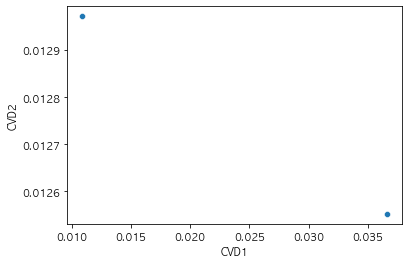

In [49]:
# 3) df1에서 CVD1과 CVD2 데이터의 상관성이 있는지 분석하고자 한다.
#     - CVD1과 CVD2값의 산점도를 Scatter plot으로 시각화
#     - '분류', A와 B에 따라 CVD1과 CDV2값의 산점도를 Scatter plot으로 시각화

df1[['CVD1', 'CVD2']]
df_1 = df1.pivot_table(index='분류', values=['CVD1', 'CVD2'])
sns.scatterplot(data=df_1, x='CVD1', y = 'CVD2')

In [54]:
# 4) df1에서 Target값이 높은 상위 100개 데이터를 추출하여,
#     -'분류'에 (A, B) 따른 CVD3의 평균의 유의미한 차이가 있는지 가설검정
#     -'분류'에 (A, B) 따른 CVD3값의 평균을  bar chart로 시각화

df1['Target'].sort_values(ascending=False)[:100]


df2 = df1.pivot_table(index='분류', values='CVD3', aggfunc='mean').reset_index()
df2

cond1 = df2['분류'] == 'A'
cond2 = df2['분류'] == 'B'

stats.normaltest(df1['CVD3'])
stats.ranksums(df2.loc[cond1]['CVD3'], df2.loc[cond2]['CVD3'])

# df2

RanksumsResult(statistic=1.0, pvalue=0.31731050786291415)

In [33]:
# 5) df1의 '분류'에 따른 'Photo1'값과 'Photo2'값의 합/최대/최소값을 계산

df1.pivot_table(index='분류', values=['Photo1', 'Photo2'], aggfunc=['sum', 'min', 'max'])

sum                     min                  max           
         Photo1        Photo2    Photo1        Photo2 Photo1     Photo2
분류                                                                     
A   2020.854284   9129.070599  0.003882  6.481900e+01   35.0  74.618795
B   2931.414587  12873.318680  0.003726  5.028307e-19   35.0  95.724768

In [44]:
# 6) df1의 'DATE'항목을 날짜데이터로 변환하여, 'DATE_dt'로 선언한 뒤, 일자만 추출하여,
#     -'분류'에 따른 '일자'별 'Target'값의 합을 계산

df1['DATE_dt'] = pd.to_datetime(df1['DATE'], format = ('%Y-%M-%d'))
df1['day'] = df1['DATE_dt'].dt.day
df1.pivot_table(index='분류', columns = 'day',values='Target', aggfunc='sum')  

day,1,2,9,10,11,12,13,14,15,16,...,22,23,24,25,26,27,28,29,30,31
분류,,,,,,,,,,,,,,,,,,,,,
A,2.5,3.2,NaN,NaN,NaN,5.2,6.6,0.9,NaN,0.3,...,NaN,1.2,1.6,3.8,4.3,9.4,7.6,3.9,4.6,3.1
B,10.1,3.7,2.0,0.9,2.0,0.8,NaN,0.5,0.2,NaN,...,5.2,6.0,3.6,7.3,8.0,3.8,7.8,5.6,2.4,3.7
